In [12]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from numpy.typing import NDArray

In [13]:
def generate_markov_chain(s_words: list[str], t_words: list[str], bow: list[str]) -> tuple[NDArray, NDArray]:
    s_matrix = [[0. for _ in range(len(bow))] for _ in range(len(bow))]
    t_matrix = [[0. for _ in range(len(bow))] for _ in range(len(bow))]

    for i in range(1, len(s_words)):
        currIdx = bow.index(s_words[i])
        prevIdx = bow.index(s_words[i-1])
        s_matrix[prevIdx][currIdx] += 1

    for i in range(1, len(t_words)):
        currIdx = bow.index(t_words[i])
        prevIdx = bow.index(t_words[i-1])
        t_matrix[prevIdx][currIdx] += 1

    for matrix in [s_matrix, t_matrix]:
        for row in matrix:
            total = sum(row)
            if total == 0:
                continue
            for i in range(len(row)):
                row[i] = row[i] / total

    return (np.array(s_matrix), np.array(t_matrix))

In [14]:
data = pd.read_csv("pipati.csv")

data.head()

,Juego No.,Yuna,Rich
0,Juego 1,Tijera,Tijera
1,Juego 2,Piedra,Piedra
2,Juego 3,Piedra,Piedra
3,Juego 4,Tijera,Piedra
4,Juego 5,Piedra,Tijera


In [15]:
game_options = ["Piedra", "Papel", "Tijera"]
yuna_m, rich_m = generate_markov_chain(
    data["Yuna"].to_list(), data["Rich"].to_list(), game_options
)
print("Player 1:\n", yuna_m)
print("Player 2:\n", rich_m)

Player 1:
 [[0.33333333 0.22222222 0.44444444]
 [0.33333333 0.         0.66666667]
 [0.71428571 0.28571429 0.        ]]
Player 2:
 [[0.375      0.         0.625     ]
 [0.         0.5        0.5       ]
 [0.55555556 0.22222222 0.22222222]]


In [ ]:
def generate_random_games(p1_matrix: NDArray, p2_matrix: NDArray, n_games: int):
    p1_last = random.sample(game_options, 1)[0]
    p2_last = random.sample(game_options, 1)[0]

    p1_games = [p1_last]
    p2_games = [p2_last]

    for _ in range(n_games - 1):
        p1_weights = p1_matrix[game_options.index(p1_last)]
        p2_weights = p2_matrix[game_options.index(p2_last)]

        p1_last = np.random.choice(game_options, p=p1_weights)
        p2_last = np.random.choice(game_options, p=p2_weights)

        p1_games.append(p1_last)
        p2_games.append(p2_last)

    return p1_games, p2_games

In [17]:
def plot_all_option_counts(results_list, n_games_list, player_names):
    _, axes = plt.subplots(len(n_games_list), len(player_names), figsize=(12, 12))
    colors = [
        "#1f77b4",
        "#ff7f0e",
        "#2ca02c",
    ]

    for row, (n_games, results) in enumerate(zip(n_games_list, results_list)):
        for col, player_idx in enumerate([0, 1]):
            counts = (
                pd.Series(results[player_idx])
                .value_counts()
                .reindex(game_options, fill_value=0)
            )
            percentages = counts / counts.sum() * 100
            ax = axes[row, col] if len(n_games_list) > 1 else axes[col]
            bars = ax.bar(game_options, counts, color=colors)
            ax.set_title(f"{player_names[col]} - {n_games} games")
            ax.set_xlabel("Option")
            ax.set_ylabel("Count")
            ax.set_ylim(0, n_games)

            for bar, pct in zip(bars, percentages):
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2,
                    f"{pct:.1f}%",
                    ha="center",
                    va="bottom",
                    fontsize=10,
                )
    plt.tight_layout()
    plt.show()

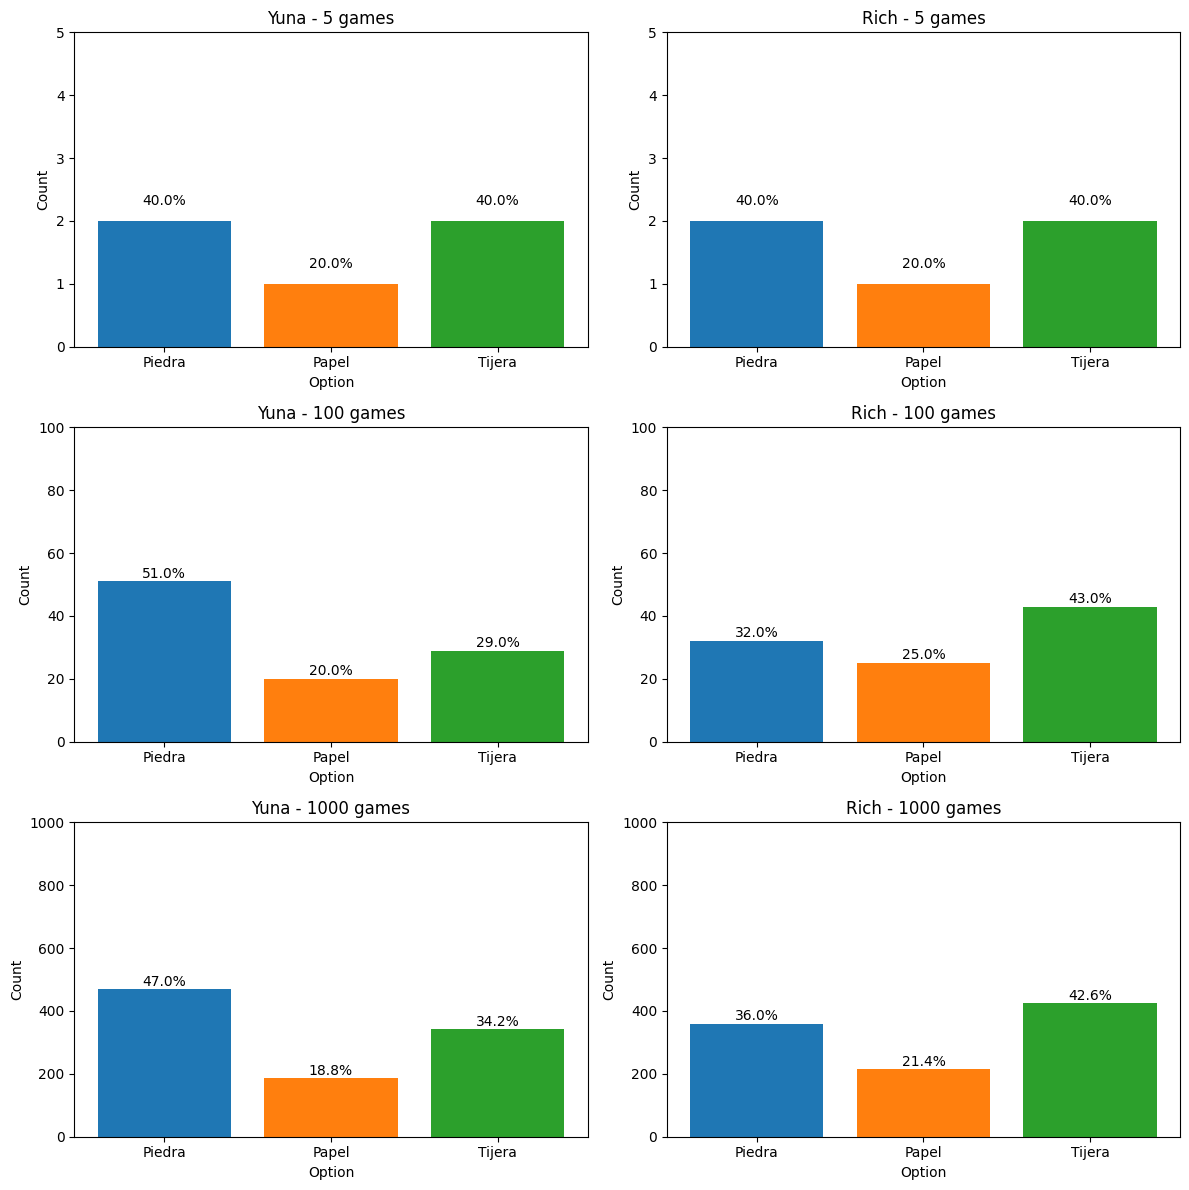

In [21]:
results_5 = generate_random_games(yuna_m, rich_m, 5)
results_100 = generate_random_games(yuna_m, rich_m, 100)
results_1000 = generate_random_games(yuna_m, rich_m, 1000)

plot_all_option_counts(
    [results_5, results_100, results_1000],
    [5, 100, 1000],
    ['Yuna', 'Rich']
)

# Probabilidades

Los resultados de la cantidad de juegos jugados varían mucho cuando se juegan solo 5 juegos, sin embargo, cuando se juegan 100 o 1000 juegos, los porcentajes se estabilizan más. Se puede observar claramente que el papel es la opción menos preferida.